In [1]:
import os
import re
import seaborn as sb

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
import tensorflow
import pandas as pd
import numpy
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
import math
from sklearn.preprocessing import MinMaxScaler
#15, 6
import matplotlib.pyplot as plt
import time
#import statsmodels
#from statsmodels.tsa.stattools import adfuller
#import statsmodels.api as sm
import scipy
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn import metrics

In [3]:
import keras
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam, SGD
import keras.callbacks as callbacks
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K

Using TensorFlow backend.


In [4]:
dirin = '/home/webadmin/run_layer1/'
dirout = '/home/webadmin/plots/'

In [6]:
job = joblib.load(dirin+'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_100x85_neurons_sort_6_etbin_2_etabin_0_trn_desc.jbl')

In [45]:
a = 'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_80x60_neurons_sort_0_etbin_2_etabin_0_trn_desc.jbl'

a.split('_')

['RawData',
 '1',
 'folds',
 '1',
 'inits',
 '500',
 'epochs',
 '26103',
 'batch',
 'size',
 'tanh',
 'hidden',
 'activation',
 'linear',
 'output',
 'activation',
 'kullback',
 'leibler',
 'divergence',
 'metric',
 'mean',
 'squared',
 'error',
 'loss',
 '80x60',
 'neurons',
 'sort',
 '0',
 'etbin',
 '2',
 'etabin',
 '0',
 'trn',
 'desc.jbl']

In [13]:
#job[0].keys()
job[0]['val_losS'][-1]
job[0]['val_kullback_leibler_divergence'][-1]


0.93347685207748488

In [12]:
#epochs = {}
#loss = {}
#kl = {}
#val_loss = {}
#val_kl = {}

all_mse = []
all_kl = []
mse = []
std_mse = []
kl = []
std_kl = []
neurons = []

#layer = '40x20'

#layers = ['100x100','100x95','100x90','100x85','100x80','100x70','100x60','100x50','100x40','100x30','100x20','100x10']
layers = ['100x100','100x90','100x85','100x70','100x55','100x40','100x25','100x10','100x3']

dirin='/home/caducovas/DeepRinger/data/run_layer1/adam1/'

for layer in layers:
    print "Layer: "+str(layer)
    neurons.append(layer.split('x')[1])
    files = [f for f in os.listdir(dirin) if (f.endswith( ('.jbl') ) and f.split('_')[24] == layer)]
    for file in files:
        job = joblib.load(dirin+file)
        #print file.split('_')[27]
        all_mse.append(job[0]['val_losS'][-1])
        all_kl.append(job[0]['val_kullback_leibler_divergence'][-1])
    mse.append(np.mean(all_mse))
    std_mse.append(np.std(all_mse))
    kl.append(np.mean(all_kl))
    std_kl.append(np.std(all_kl))


Layer: 100x100
Layer: 100x90
Layer: 100x85
Layer: 100x70
Layer: 100x55
Layer: 100x40
Layer: 100x25
Layer: 100x10
Layer: 100x3


In [15]:
mse = np.array(mse).astype(np.float)
std_mse = np.array(std_mse).astype(np.float)
kl = np.array(kl).astype(np.float)
std_kl = np.array(std_kl).astype(np.float)
neurons = np.array(neurons).astype(np.float)


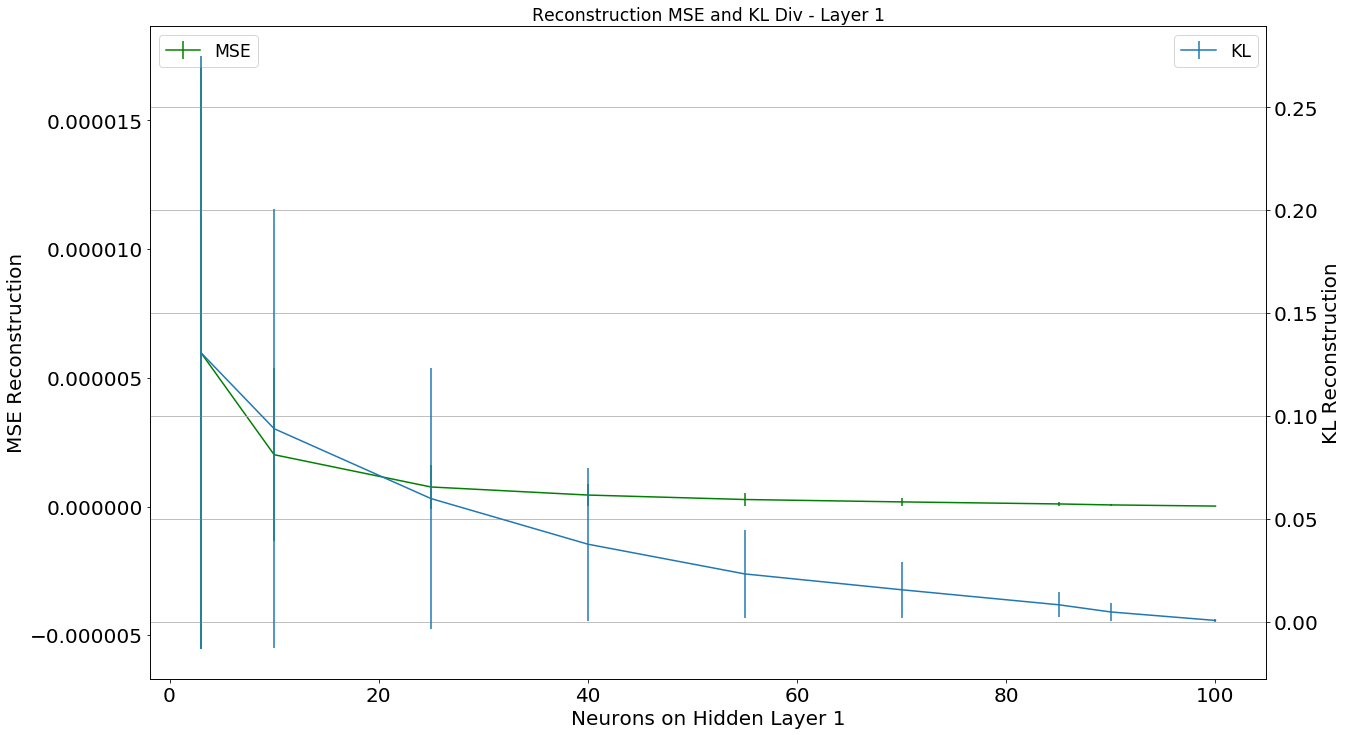

In [18]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
ax2 = ax1.twinx()
ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax2.errorbar(neurons, y=kl, yerr=std_kl)
#ax2.set_ylabel('sin')


plt.title('Reconstruction MSE and KL Div - Layer 1',fontsize= 'xx-large')
ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax2.set_ylabel('KL Reconstruction',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
ax1.legend(['MSE'], loc=2,fontsize = 'xx-large')
ax2.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
#fig.savefig(dirout+'reconstruction_adam.png')

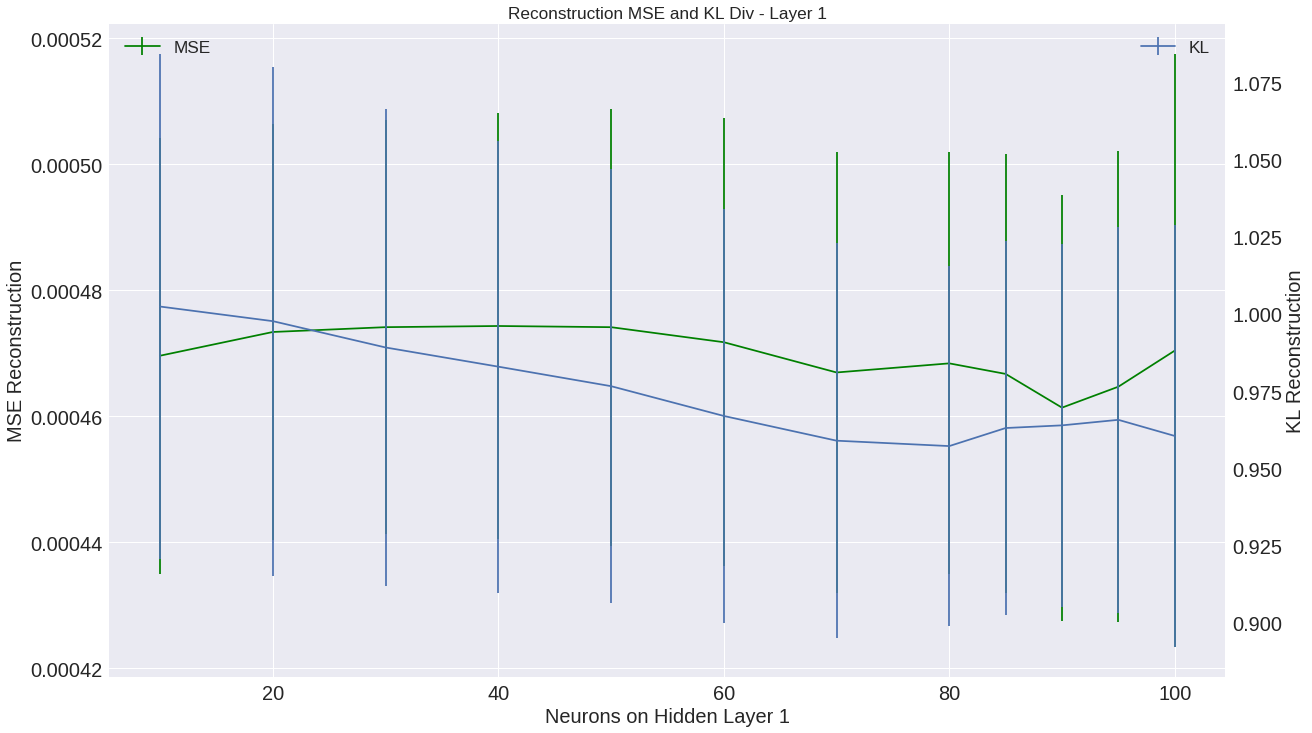

In [31]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
ax2 = ax1.twinx()
ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax2.errorbar(neurons, y=kl, yerr=std_kl)
#ax2.set_ylabel('sin')


plt.title('Reconstruction MSE and KL Div - Layer 1',fontsize= 'xx-large')
ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax2.set_ylabel('KL Reconstruction',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
ax1.legend(['MSE'], loc=2,fontsize = 'xx-large')
ax2.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction.png')

In [16]:
epochs.keys()

NameError: name 'epochs' is not defined

# Train MSE

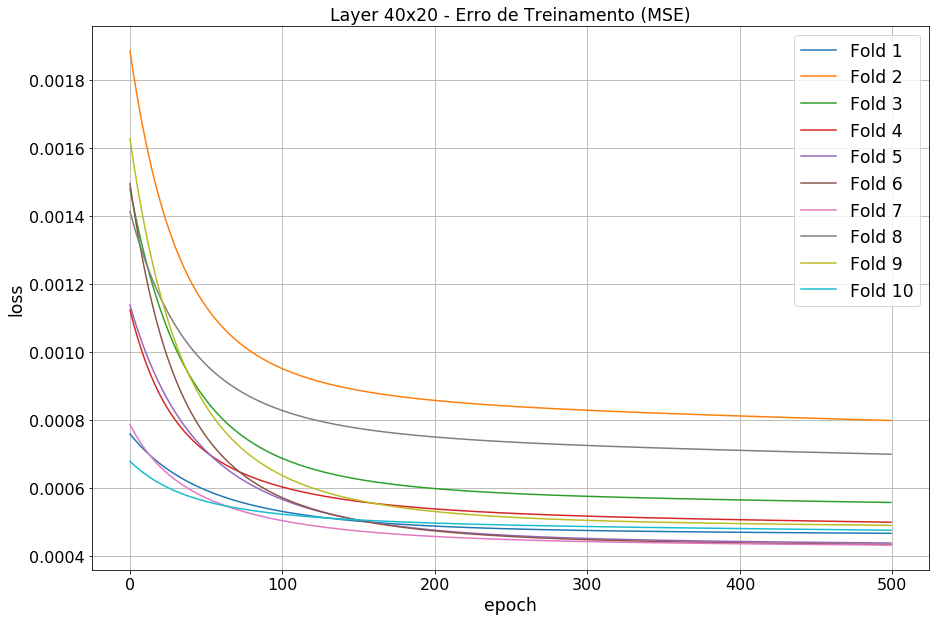

In [180]:
fig, ax = plt.subplots(1,figsize=(15,10))
list_t = []
for i in range(len(epochs.keys())):
    plt.plot(epochs[i],loss[i])
    #plt.plot(T[i].history['val_loss'])
    list_t.append('Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Layer '+layer+' - Erro de Treinamento (MSE)',fontsize= 'xx-large')
plt.ylabel('loss',fontsize= 'xx-large')
plt.xlabel('epoch',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.grid()
plt.savefig(dirout+'layer_'+layer+'_loss.png')
plt.show()

# Val MSE

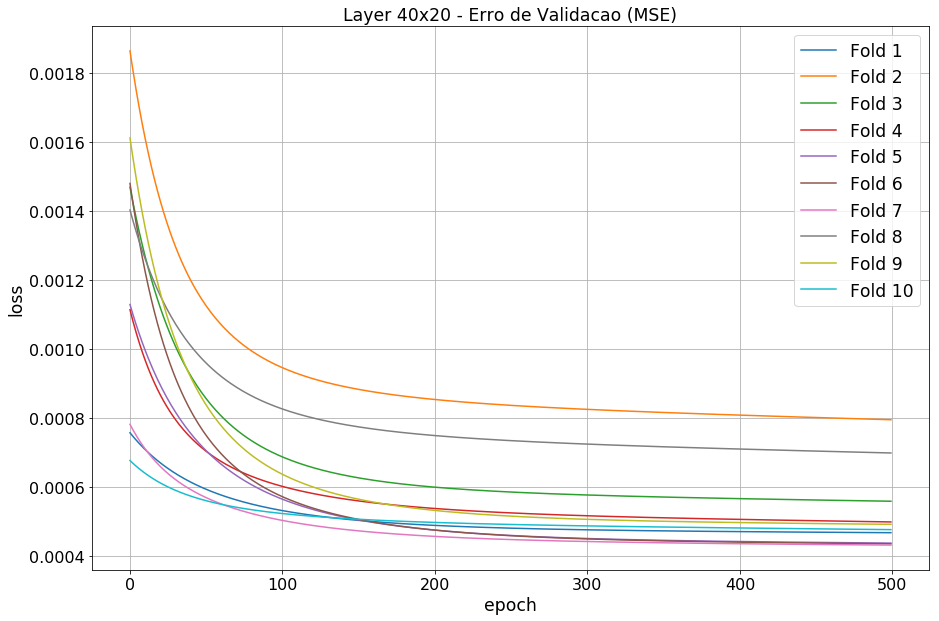

In [181]:
fig, ax = plt.subplots(1,figsize=(15,10))
list_t = []
for i in range(len(epochs.keys())):
    plt.plot(epochs[i],val_loss[i])
    #plt.plot(T[i].history['val_loss'])
    list_t.append('Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Layer '+layer+' - Erro de Validacao (MSE)',fontsize= 'xx-large')
plt.ylabel('loss',fontsize= 'xx-large')
plt.xlabel('epoch',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.grid()
plt.savefig(dirout+'layer_'+layer+'_valloss.png')
plt.show()

# Train KL

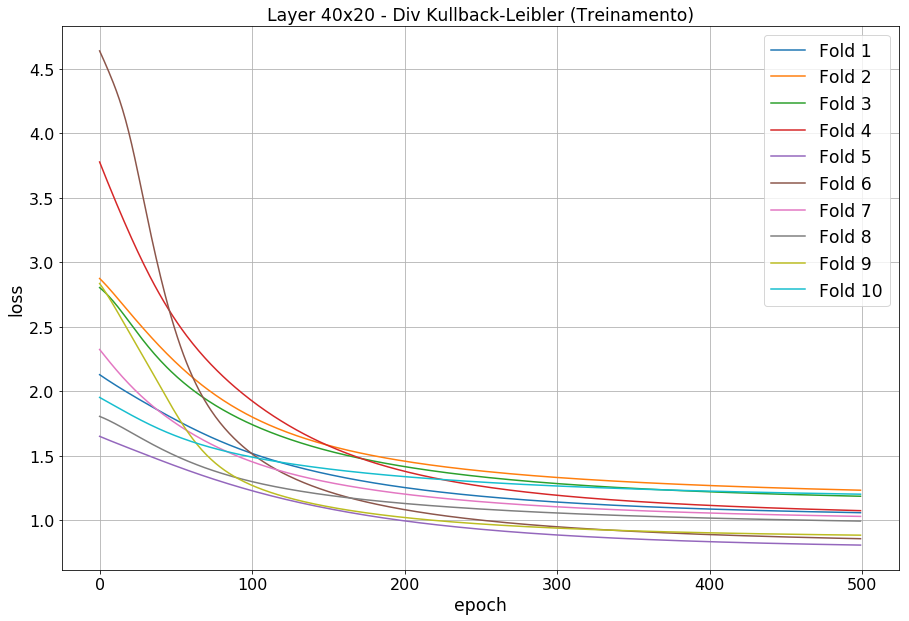

In [182]:
fig, ax = plt.subplots(1,figsize=(15,10))
list_t = []
for i in range(len(epochs.keys())):
    plt.plot(epochs[i],kl[i])
    #plt.plot(T[i].history['val_loss'])
    list_t.append('Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Layer '+layer+' - Div Kullback-Leibler (Treinamento)',fontsize= 'xx-large')
plt.ylabel('loss',fontsize= 'xx-large')
plt.xlabel('epoch',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.grid()
plt.savefig(dirout+'layer_'+layer+'_kl.png')
plt.show()

# Val KL

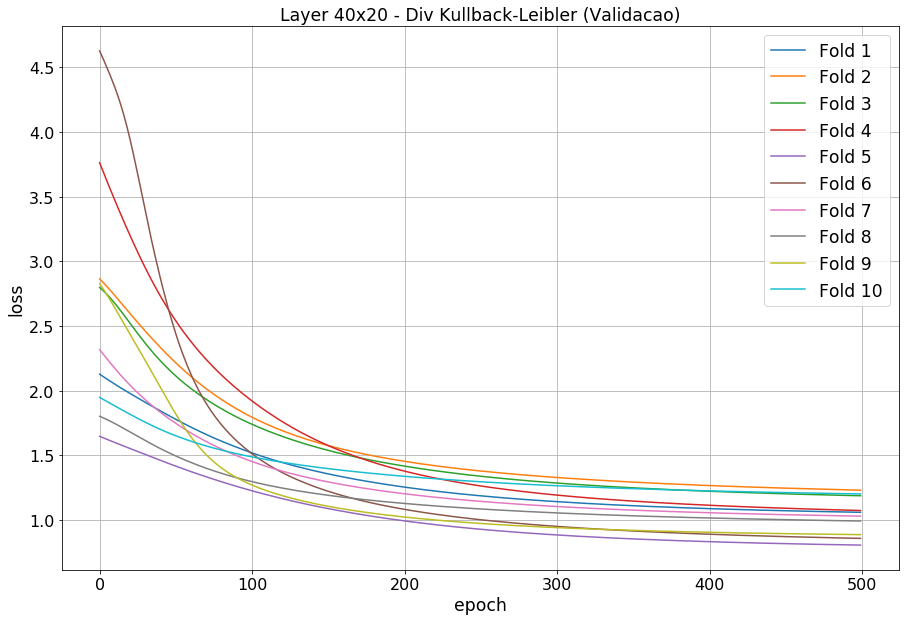

In [183]:
fig, ax = plt.subplots(1,figsize=(15,10))
list_t = []
for i in range(len(epochs.keys())):
    plt.plot(epochs[i],val_kl[i])
    #plt.plot(T[i].history['val_loss'])
    list_t.append('Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Layer '+layer+' - Div Kullback-Leibler (Validacao)',fontsize= 'xx-large')
plt.ylabel('loss',fontsize= 'xx-large')
plt.xlabel('epoch',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.grid()
plt.savefig(dirout+'layer_'+layer+'_valkl.png')
plt.show()

In [ ]:
    def getDataProjection(self, data, trgt, hidden_neurons=[80], layer=1, ifold=0,sort=999,etBinIdx=999, etaBinIdx=999):
        if layer > len(hidden_neurons):
            print "[-] Error: The parameter layer must be less or equal to the size of list hidden_neurons"
            return 1
        proj_all_data = data #self.normalizeData(data=data, ifold=ifold)
        print sort,etBinIdx,etaBinIdx
        if layer == 1:
            neurons_str = self.getNeuronsString(data, hidden_neurons[:layer])
            previous_model_str = '%s/%s/%s_%i_folds_%s_%s_neurons'%(self.save_path,
                                                                    self.analysis_str,
                                                                    self.prefix_str,
                                                                    self.n_folds,
                                                                    self.params_str,
                                                                    neurons_str)
            if not self.development_flag:
                file_name = '%s_sort_%i_etbin_%i_etabin_%i_model.h5'%(previous_model_str,sort,etBinIdx, etaBinIdx)
            else:
                file_name = '%s_sort_%i_etbin_%i_etabin_%i_model_dev.h5'%(previous_model_str,sort,etBinIdx, etaBinIdx)

            # Check if previous layer model was trained
            if not os.path.exists(file_name):
                self.trainLayer(data=data, trgt=trgt, ifold=ifold, hidden_neurons = hidden_neurons[:layer], layer=layer, folds_sweep=True)

            layer_model = load_model(file_name, custom_objects={'%s'%self.trn_params.params['loss']: self.lossFunction})
            print "Loading Model: "+file_name
            get_layer_output = K.function([layer_model.layers[0].input],
                                          [layer_model.layers[1].output])
            # Projection of layer
            proj_all_data = get_layer_output([proj_all_data])[0]
        elif layer > 1:
            for ilayer in range(1,layer+1):
                neurons_str = self.getNeuronsString(data, hidden_neurons[:ilayer])
                previous_model_str = '%s/%s/%s_%i_folds_%s_%s_neurons'%(self.save_path,
                                                                        self.analysis_str,
                                                                        self.prefix_str,
                                                                        self.n_folds,
                                                                        self.params_str,
                                                                        neurons_str)
                if not self.development_flag:
                    file_name = '%s_sort_%i_etbin_%i_etabin_%i_model.h5'%(previous_model_str,sort,etBinIdx, etaBinIdx)
                else:
                    file_name = '%s_sort_%i_etbin_%i_etabin_%i_model_dev.h5'%(previous_model_str,sort,etBinIdx, etaBinIdx)

                # Check if previous layer model was trained
                if not os.path.exists(file_name):
                    self.trainLayer(data=data, trgt=trgt, ifold=ifold, hidden_neurons = hidden_neurons[:ilayer], layer=ilayer, folds_sweep=True)

                print "Loading Model: "+file_name
                layer_model = load_model(file_name, custom_objects={'%s'%self.trn_params.params['loss']: self.lossFunction})
                print "Model Loaded"
                get_layer_output = K.function([layer_model.layers[0].input],
                                              [layer_model.layers[1].output])
                # Projection of layer
                proj_all_data = get_layer_output([proj_all_data])[0]
        return proj_all_data

In [5]:
val_data = np.load('/home/webadmin/datasets/val_Data.npy')

In [6]:
val_data.shape

(1358079, 100)

In [7]:
model_40X20.layers[2].get_weights()[0].shape

NameError: name 'model_40X20' is not defined

In [8]:
model_100X100 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_100x100_neurons_sort_4_etbin_2_etabin_0_model.h5')
model_100X80 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_100x80_neurons_sort_4_etbin_2_etabin_0_model.h5')
model_80X60 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_80x60_neurons_sort_4_etbin_2_etabin_0_model.h5')
model_60X40 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_60x40_neurons_sort_4_etbin_2_etabin_0_model.h5')
model_40X20 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_26103_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_40x20_neurons_sort_4_etbin_2_etabin_0_model.h5')

In [9]:
enc_weights_100X100 = model_100X100.layers[0].get_weights()
enc_weights_100X80 = model_100X80.layers[0].get_weights()
enc_weights_80X60 = model_80X60.layers[0].get_weights()
enc_weights_60X40 = model_60X40.layers[0].get_weights()
enc_weights_40X20 = model_40X20.layers[0].get_weights()

dec_weights_100X100 = model_100X100.layers[2].get_weights()
dec_weights_100X80 = model_100X80.layers[2].get_weights()
dec_weights_80X60 = model_80X60.layers[2].get_weights()
dec_weights_60X40 = model_60X40.layers[2].get_weights()
dec_weights_40X20 = model_40X20.layers[2].get_weights()

#model.add(Activation('tanh'))

In [134]:
variance_exp = []

In [155]:
model = Sequential()
model.add(Dense(100, input_dim=val_data.shape[1], weights=model_100X100.layers[0].get_weights()))
model.add(Dense(80, weights=enc_weights_100X80))
model.add(Dense(60, weights=enc_weights_80X60))
model.add(Dense(40, weights=enc_weights_60X40))
model.add(Dense(20, weights=enc_weights_40X20))
model.add(Dense(40, weights=dec_weights_40X20))
model.add(Dense(60, weights=dec_weights_60X40))
model.add(Dense(80, weights=dec_weights_80X60))
model.add(Dense(100, weights=dec_weights_100X80))
model.add(Dense(100, weights=dec_weights_100X100))
model.add(Activation('tanh'))

In [185]:
#setss = [(0,26103),(1,26103),(2,26103),(3,26103),(4,26103),(5,26103),(6,26103),(7,26102),(8,26102),(9,26102)]
#for ifold,size in setss:
#    print size
val_data.shape

(1358079, 100)

In [303]:
#variance_exp1 = []
#variance_exp2 = []
#variance_exp3 = []
#variance_exp4 = []
#variance_exp5 = []

kl_cong1 = np.zeros((10, 100))
kl_cong2 = np.zeros((10, 100))
kl_cong3 = np.zeros((10, 100))
kl_cong4 = np.zeros((10, 100))
kl_cong5 = np.zeros((10, 100))


mi1 = []
mi2 = []
mi3 = []
mi4 = []
mi5 = []

setss = [(0,26103),(1,26103),(2,26103),(3,26103),(4,26103),(5,26103),(6,26103),(7,26102),(8,26102),(9,26102)]
#setss = [(4,26103)]

for ifold,size in setss:
    print ifold
    model_100X100 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_'+str(size)+'_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_100x100_neurons_sort_'+str(ifold)+'_etbin_2_etabin_0_model.h5')
    model_100X80 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_'+str(size)+'_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_100x80_neurons_sort_'+str(ifold)+'_etbin_2_etabin_0_model.h5')
    model_80X60 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_'+str(size)+'_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_80x60_neurons_sort_'+str(ifold)+'_etbin_2_etabin_0_model.h5')
    model_60X40 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_'+str(size)+'_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_60x40_neurons_sort_'+str(ifold)+'_etbin_2_etabin_0_model.h5')
    model_40X20 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_'+str(size)+'_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_40x20_neurons_sort_'+str(ifold)+'_etbin_2_etabin_0_model.h5')
    enc_weights_100X100 = model_100X100.layers[0].get_weights()
    enc_weights_100X80 = model_100X80.layers[0].get_weights()
    enc_weights_80X60 = model_80X60.layers[0].get_weights()
    enc_weights_60X40 = model_60X40.layers[0].get_weights()
    enc_weights_40X20 = model_40X20.layers[0].get_weights()

    dec_weights_100X100 = model_100X100.layers[2].get_weights()
    dec_weights_100X80 = model_100X80.layers[2].get_weights()
    dec_weights_80X60 = model_80X60.layers[2].get_weights()
    dec_weights_60X40 = model_60X40.layers[2].get_weights()
    dec_weights_40X20 = model_40X20.layers[2].get_weights()
    
    model1 = Sequential()
    model1.add(Dense(100, input_dim=val_data.shape[1], weights=model_100X100.layers[0].get_weights()))
    model1.add(Dense(100, weights=dec_weights_100X100))
    model1.add(Activation('tanh'))
    ###
    output_layer = model1.predict(val_data, batch_size=1358079, verbose=1)
    ###
    #centered_matrix = val_data.T - val_data.T.mean(axis=1)[:, np.newaxis]
    #cov = np.dot(centered_matrix, centered_matrix.T)
    #eigvals, eigvecs = np.linalg.eig(cov)
    ###
    #centered_matrix = output_layer.T - output_layer.T.mean(axis=1)[:, np.newaxis]
    #cov = np.dot(centered_matrix, centered_matrix.T)
    #out_eigvals, out_eigvecs = np.linalg.eig(cov)
    
    #variance_exp1.append(out_eigvals.sum()/eigvals.sum())
    #mi1.append(normalized_mutual_info_score(val_data.T[0], output_layer.T[0]))
    
    pdf,bins = KLDiv_conj(val_data.T,output_layer.T)
    kl_cong1[ifold] = pdf
    
    model2 = Sequential()
    model2.add(Dense(100, input_dim=val_data.shape[1], weights=model_100X100.layers[0].get_weights()))
    model2.add(Dense(80, weights=enc_weights_100X80))
    model2.add(Dense(100, weights=dec_weights_100X80))
    model2.add(Dense(100, weights=dec_weights_100X100))
    model2.add(Activation('tanh'))
    ###
    output_layer = model2.predict(val_data, batch_size=1358079, verbose=1)
    ###
    #centered_matrix = val_data.T - val_data.T.mean(axis=1)[:, np.newaxis]
    #cov = np.dot(centered_matrix, centered_matrix.T)
    #eigvals, eigvecs = np.linalg.eig(cov)
    ###
    #centered_matrix = output_layer.T - output_layer.T.mean(axis=1)[:, np.newaxis]
    #cov = np.dot(centered_matrix, centered_matrix.T)
    #out_eigvals, out_eigvecs = np.linalg.eig(cov)
    
    #variance_exp2.append(out_eigvals.sum()/eigvals.sum())
    #mi2.append(normalized_mutual_info_score(val_data.T[0], output_layer.T[0]))
    #for ianel in range(val_data.T.shape[0]):
    #    pdf,bins = KLDiv_cong(val_data.T[ianel],output_layer.T[ianel])
    #    #kl.append(pdf)
    #    kl_cong2[ifold][ianel] = pdf

    pdf,bins = KLDiv_conj(val_data.T,output_layer.T)
    kl_cong2[ifold] = pdf
    
    model3 = Sequential()
    model3.add(Dense(100, input_dim=val_data.shape[1], weights=model_100X100.layers[0].get_weights()))
    model3.add(Dense(80, weights=enc_weights_100X80))
    model3.add(Dense(60, weights=enc_weights_80X60))
    model3.add(Dense(80, weights=dec_weights_80X60))
    model3.add(Dense(100, weights=dec_weights_100X80))
    model3.add(Dense(100, weights=dec_weights_100X100))
    model3.add(Activation('tanh'))
    ###
    output_layer = model3.predict(val_data, batch_size=1358079, verbose=1)
    ###
    #centered_matrix = val_data.T - val_data.T.mean(axis=1)[:, np.newaxis]
    #cov = np.dot(centered_matrix, centered_matrix.T)
    #eigvals, eigvecs = np.linalg.eig(cov)
    ###
    #centered_matrix = output_layer.T - output_layer.T.mean(axis=1)[:, np.newaxis]
    #cov = np.dot(centered_matrix, centered_matrix.T)
    #out_eigvals, out_eigvecs = np.linalg.eig(cov)
    
    #variance_exp3.append(out_eigvals.sum()/eigvals.sum())
    #mi3.append(normalized_mutual_info_score(val_data.T[0], output_layer.T[0]))
    pdf,bins = KLDiv_conj(val_data.T,output_layer.T)
    kl_cong3[ifold] = pdf
    
    model4 = Sequential()
    model4.add(Dense(100, input_dim=val_data.shape[1], weights=model_100X100.layers[0].get_weights()))
    model4.add(Dense(80, weights=enc_weights_100X80))
    model4.add(Dense(60, weights=enc_weights_80X60))
    model4.add(Dense(40, weights=enc_weights_60X40))
    model4.add(Dense(60, weights=dec_weights_60X40))
    model4.add(Dense(80, weights=dec_weights_80X60))
    model4.add(Dense(100, weights=dec_weights_100X80))
    model4.add(Dense(100, weights=dec_weights_100X100))
    model4.add(Activation('tanh'))
    ###
    output_layer = model4.predict(val_data, batch_size=1358079, verbose=1)
    ###
    #centered_matrix = val_data.T - val_data.T.mean(axis=1)[:, np.newaxis]
    #cov = np.dot(centered_matrix, centered_matrix.T)
    #eigvals, eigvecs = np.linalg.eig(cov)
    ###
    #centered_matrix = output_layer.T - output_layer.T.mean(axis=1)[:, np.newaxis]
    #cov = np.dot(centered_matrix, centered_matrix.T)
    #out_eigvals, out_eigvecs = np.linalg.eig(cov)
    
    #variance_exp4.append(out_eigvals.sum()/eigvals.sum())
    #mi4.append(normalized_mutual_info_score(val_data.T[0], output_layer.T[0]))
    pdf,bins = KLDiv_conj(val_data.T,output_layer.T)
    kl_cong4[ifold] = pdf
    
    model5 = Sequential()
    model5.add(Dense(100, input_dim=val_data.shape[1], weights=model_100X100.layers[0].get_weights()))
    model5.add(Dense(80, weights=enc_weights_100X80))
    model5.add(Dense(60, weights=enc_weights_80X60))
    model5.add(Dense(40, weights=enc_weights_60X40))
    model5.add(Dense(20, weights=enc_weights_40X20))
    model5.add(Dense(40, weights=dec_weights_40X20))
    model5.add(Dense(60, weights=dec_weights_60X40))
    model5.add(Dense(80, weights=dec_weights_80X60))
    model5.add(Dense(100, weights=dec_weights_100X80))
    model5.add(Dense(100, weights=dec_weights_100X100))
    model5.add(Activation('tanh'))
    ###
    output_layer = model5.predict(val_data, batch_size=1358079, verbose=1)
    ###
    #centered_matrix = val_data.T - val_data.T.mean(axis=1)[:, np.newaxis]
    #cov = np.dot(centered_matrix, centered_matrix.T)
    #eigvals, eigvecs = np.linalg.eig(cov)
    ###
    #centered_matrix = output_layer.T - output_layer.T.mean(axis=1)[:, np.newaxis]
    #cov = np.dot(centered_matrix, centered_matrix.T)
    #out_eigvals, out_eigvecs = np.linalg.eig(cov)
    
    #variance_exp5.append(out_eigvals.sum()/eigvals.sum())
    #mi5.append(normalized_mutual_info_score(val_data.T[0], output_layer.T[0]))
    pdf,bins = KLDiv_conj(val_data.T,output_layer.T)
    kl_cong5[ifold] = pdf

0
1358079/1358079 [==============================] - 8s 6us/step
1
1358079/1358079 [==============================] - 7s 5us/step
2
1358079/1358079 [==============================] - 6s 5us/step
3
1358079/1358079 [==============================] - 7s 5us/step
4
1358079/1358079 [==============================] - 7s 5us/step
5
1358079/1358079 [==============================] - 7s 5us/step
6
1358079/1358079 [==============================] - 7s 5us/step
7
1358079/1358079 [==============================] - 7s 5us/step
8
1358079/1358079 [==============================] - 7s 5us/step
9
1358079/1358079 [==============================] - 7s 5us/step


In [320]:
#pdf,bins = KLDiv_conj(val_data.T,output_layer.T)
#print pdf
print sum(sum(kl_cong5))

0.0


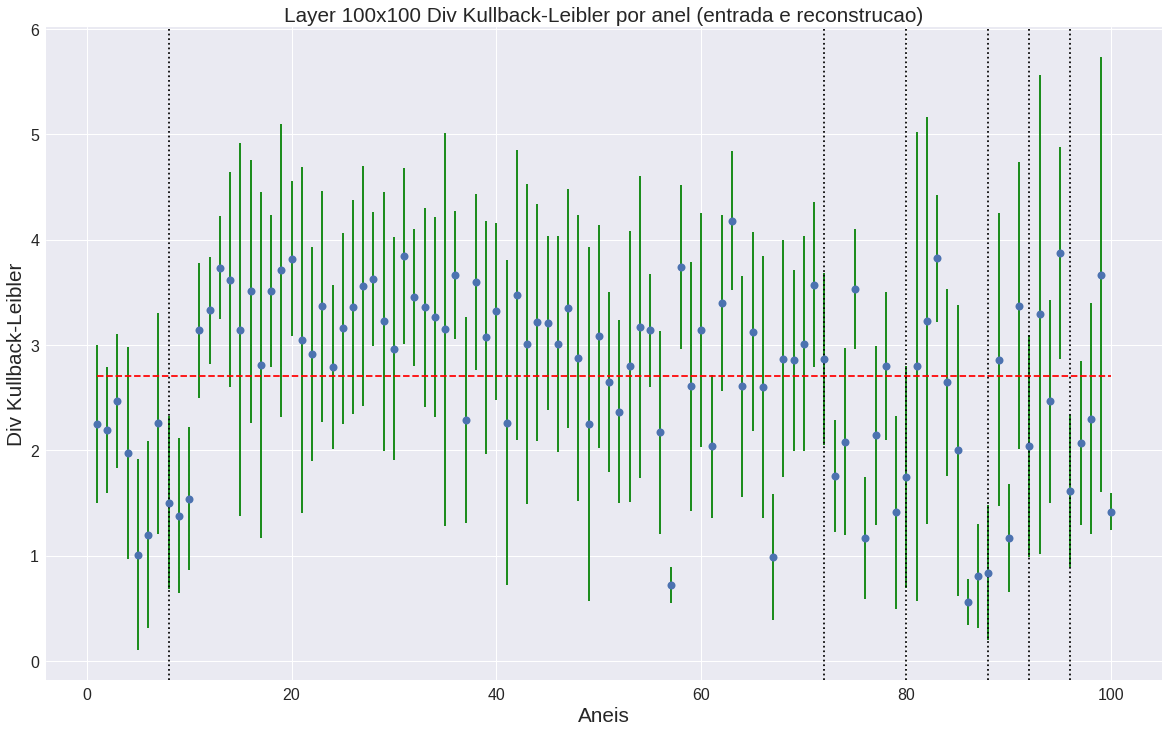

In [342]:
import matplotlib as mlp
#for i
#kl1.mean(axis=0).shape
#kl1.std(axis=0).shape

fig1 = plt.figure(figsize=(20, 12))

#mlp.axes.Axes.errorbar()

plt.errorbar(np.arange(1,101,1), y=kl1.mean(axis=0), yerr=kl1.std(axis=0),fmt='o', markersize=8,ecolor='Green')
plt.title('Layer 100x100 Div Kullback-Leibler por anel (entrada e reconstrucao)',fontsize= 'xx-large')
plt.ylabel('Div Kullback-Leibler',fontsize= 'xx-large')
plt.xlabel('Aneis',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.plot(np.arange(1,101,1),kl1.mean(axis=0).mean()*np.ones_like(np.arange(1,101,1)),'r--')

axes = plt.gca()
ylim = axes.get_ylim()

plt.plot(8.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(72.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(80.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(88.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(92.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(96.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
#plt.grid()
axes.set_ylim(ylim)

plt.savefig(dirout+'100x100_kl_recons_anel.png')
plt.show()

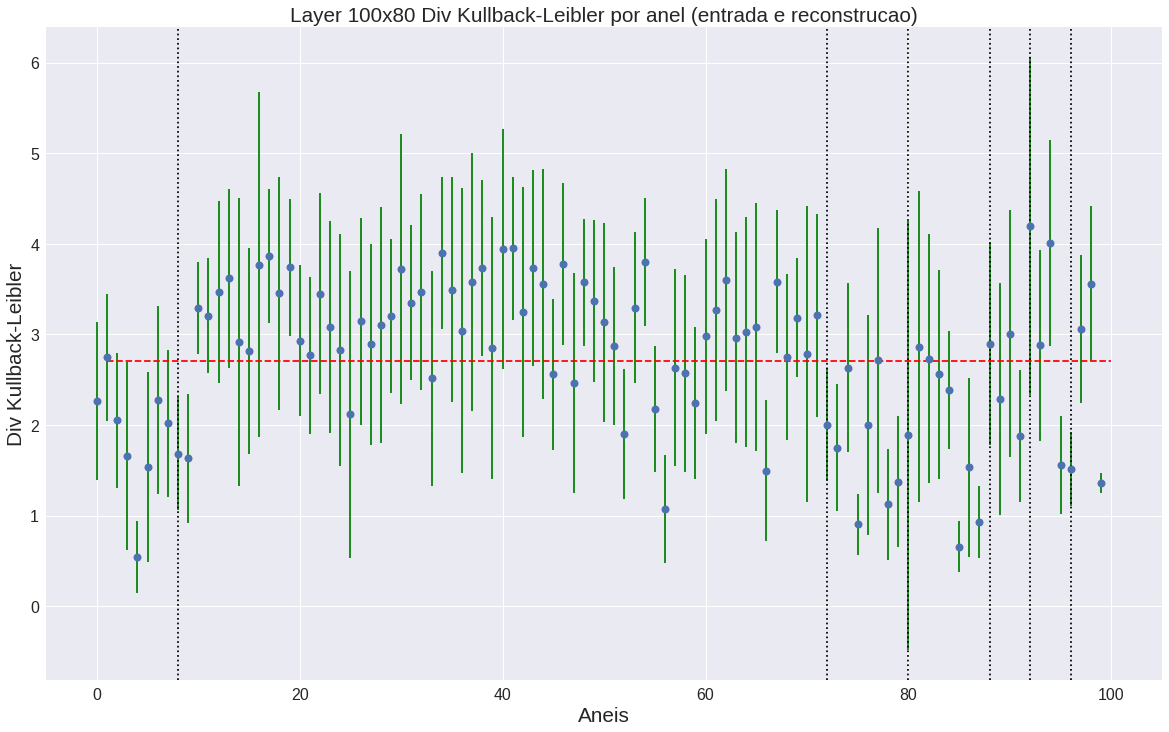

In [343]:
fig1 = plt.figure(figsize=(20, 12))

#mlp.axes.Axes.errorbar()

plt.errorbar(np.arange(100), y=kl2.mean(axis=0), yerr=kl2.std(axis=0),fmt='o', markersize=8,ecolor='Green')
plt.title('Layer 100x80 Div Kullback-Leibler por anel (entrada e reconstrucao)',fontsize= 'xx-large')
plt.ylabel('Div Kullback-Leibler',fontsize= 'xx-large')
plt.xlabel('Aneis',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.plot(np.arange(1,101,1),kl1.mean(axis=0).mean()*np.ones_like(np.arange(1,101,1)),'r--')

axes = plt.gca()
ylim = axes.get_ylim()

plt.plot(8.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(72.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(80.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(88.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(92.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(96.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
#plt.grid()
axes.set_ylim(ylim)
plt.savefig(dirout+'100x80_kl_recons_anel.png')
plt.show()

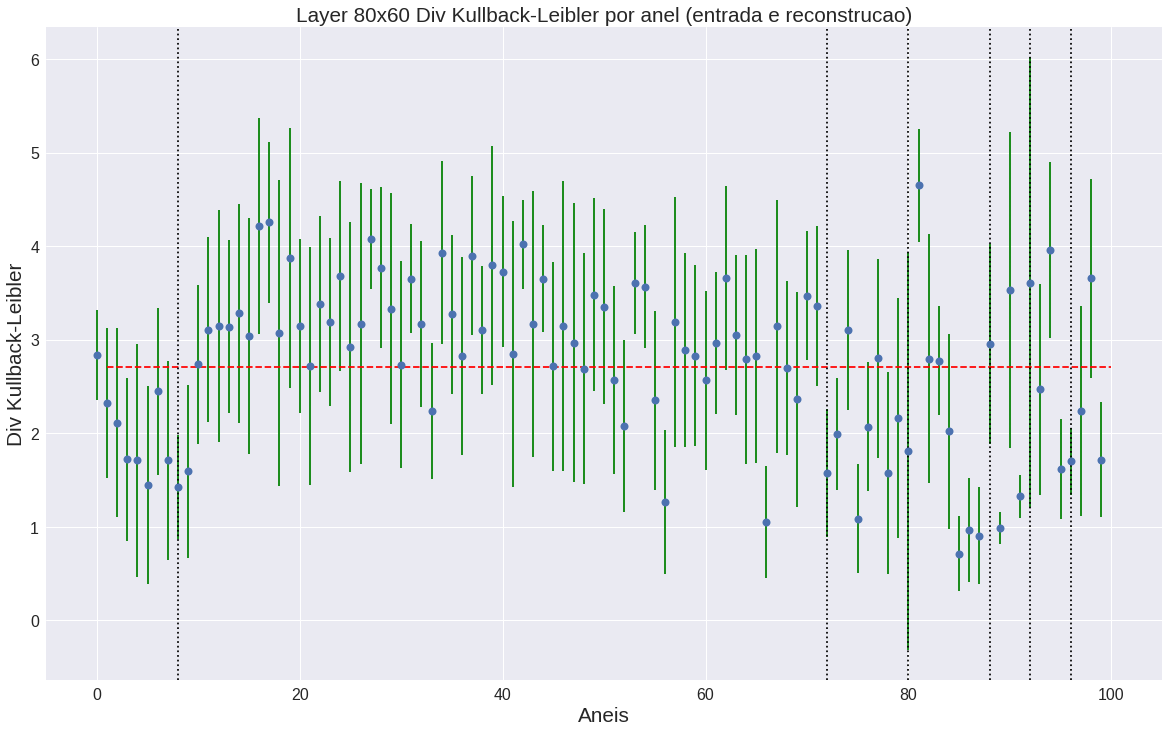

In [344]:
fig1 = plt.figure(figsize=(20, 12))

#mlp.axes.Axes.errorbar()

plt.errorbar(np.arange(100), y=kl3.mean(axis=0), yerr=kl3.std(axis=0),fmt='o', markersize=8,ecolor='Green')
plt.title('Layer 80x60 Div Kullback-Leibler por anel (entrada e reconstrucao)',fontsize= 'xx-large')
plt.ylabel('Div Kullback-Leibler',fontsize= 'xx-large')
plt.xlabel('Aneis',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.plot(np.arange(1,101,1),kl1.mean(axis=0).mean()*np.ones_like(np.arange(1,101,1)),'r--')

axes = plt.gca()
ylim = axes.get_ylim()

plt.plot(8.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(72.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(80.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(88.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(92.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(96.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
#plt.grid()
axes.set_ylim(ylim)
plt.savefig(dirout+'80X60_kl_recons_anel.png')
plt.show()

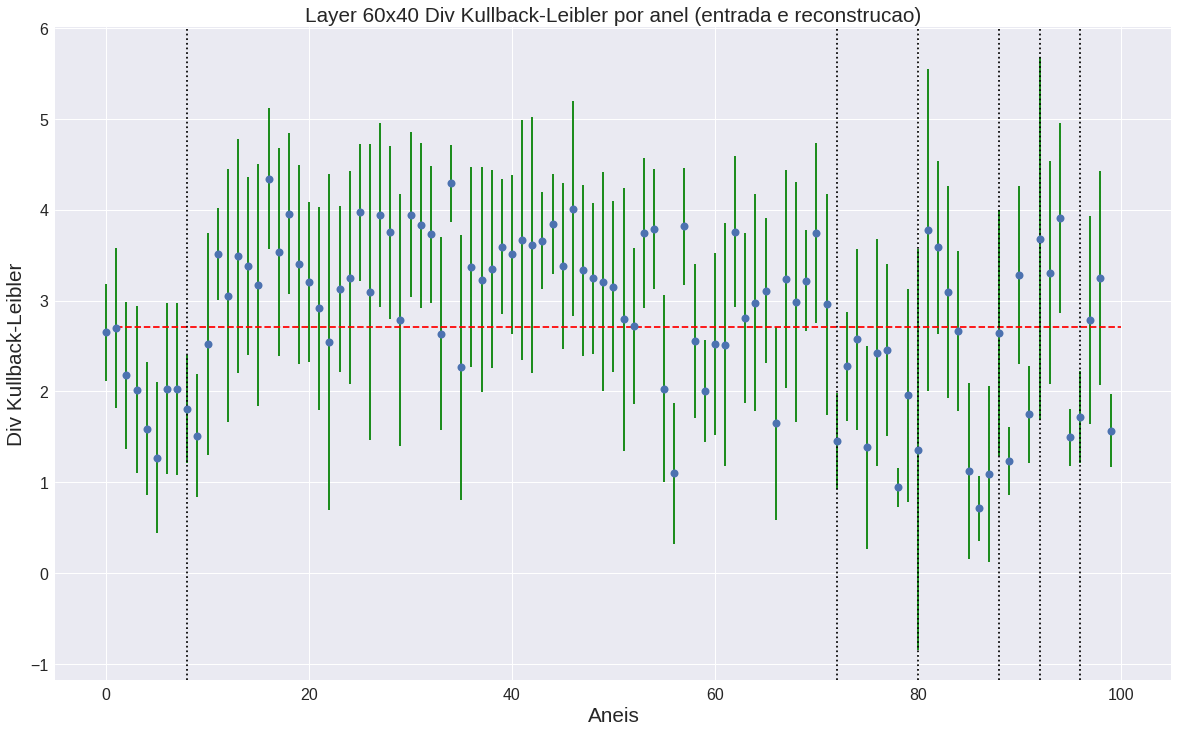

In [345]:
fig1 = plt.figure(figsize=(20, 12))

#mlp.axes.Axes.errorbar()

plt.errorbar(np.arange(100), y=kl4.mean(axis=0), yerr=kl4.std(axis=0),fmt='o', markersize=8,ecolor='Green')
plt.title('Layer 60x40 Div Kullback-Leibler por anel (entrada e reconstrucao)',fontsize= 'xx-large')
plt.ylabel('Div Kullback-Leibler',fontsize= 'xx-large')
plt.xlabel('Aneis',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.plot(np.arange(1,101,1),kl1.mean(axis=0).mean()*np.ones_like(np.arange(1,101,1)),'r--')

axes = plt.gca()
ylim = axes.get_ylim()

plt.plot(8.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(72.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(80.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(88.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(92.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(96.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
#plt.grid()
axes.set_ylim(ylim)
plt.savefig(dirout+'60X40_kl_recons_anel.png')
plt.show()

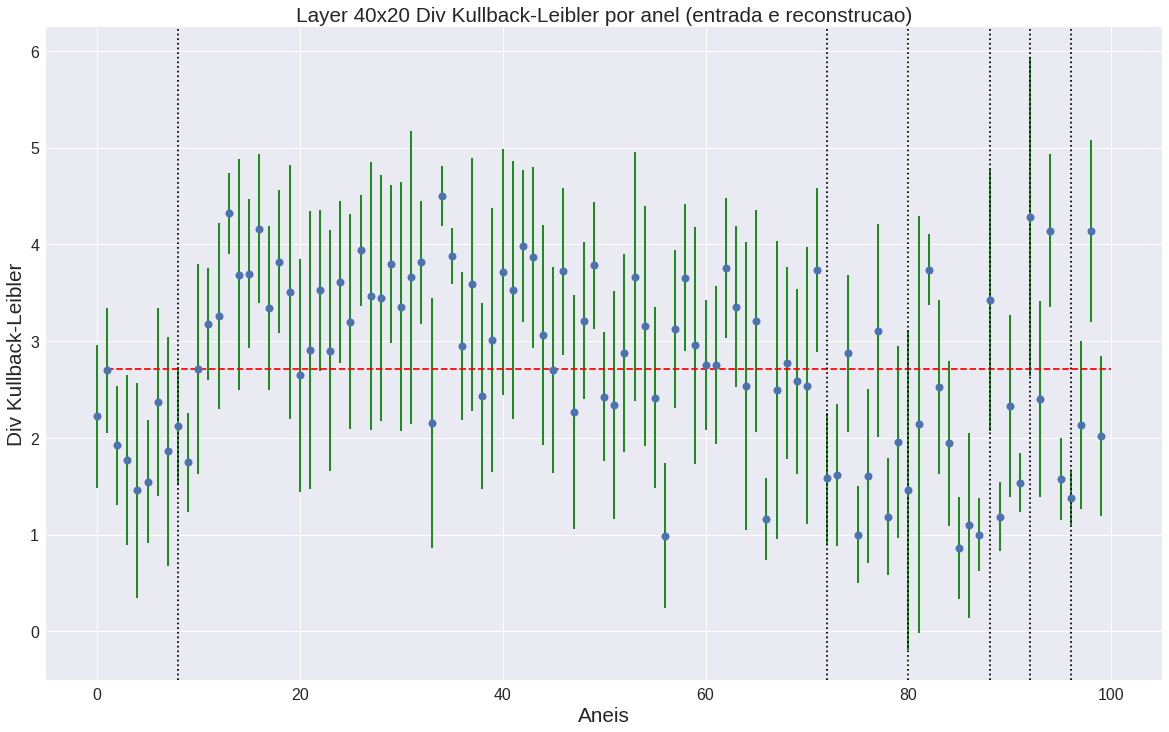

In [346]:
fig1 = plt.figure(figsize=(20, 12))

#mlp.axes.Axes.errorbar()

plt.errorbar(np.arange(100), y=kl5.mean(axis=0), yerr=kl5.std(axis=0),fmt='o', markersize=8,ecolor='Green')
plt.title('Layer 40x20 Div Kullback-Leibler por anel (entrada e reconstrucao)',fontsize= 'xx-large')
plt.ylabel('Div Kullback-Leibler',fontsize= 'xx-large')
plt.xlabel('Aneis',fontsize= 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.plot(np.arange(1,101,1),kl1.mean(axis=0).mean()*np.ones_like(np.arange(1,101,1)),'r--')

axes = plt.gca()
ylim = axes.get_ylim()

plt.plot(8.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(72.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(80.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(88.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(92.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
plt.plot(96.*np.ones_like(np.arange(ylim[0],ylim[1],0.01)),np.arange(ylim[0],ylim[1],0.01),'k:')
#plt.grid()
axes.set_ylim(ylim)
plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()

In [190]:
mi1,mi2,mi3,mi4,mi5

([0.99584908172097297],
 [0.997274131814193],
 [0.9976241444170354],
 [0.99739031684265711],
 [0.99680338963935355])

In [204]:
output_layer5.T[0]-output_layer5.T[0].mean(axis=0)

array([ 0.01283287, -0.00678199,  0.0035268 , ...,  0.01037959,
        0.00062814,  0.00026391], dtype=float32)

In [156]:

output_layer5 = model.predict(val_data, batch_size=1358079, verbose=1)

1358079/1358079 [==============================] - 6s 4us/step


In [157]:
centered_matrix = val_data.T - val_data.T.mean(axis=1)[:, np.newaxis]
cov = np.dot(centered_matrix, centered_matrix.T)
eigvals, eigvecs = np.linalg.eig(cov)

In [206]:
centered_matrix = output_layer5.T[0] - output_layer5.T[0].mean(axis=0)
cov = np.dot(centered_matrix, centered_matrix.T)
#out_eigvals, out_eigvecs = np.linalg.eig(cov)
cov

170.9736

In [159]:
variance_exp.append(out_eigvals.sum()/eigvals.sum())
out_eigvals.sum()/eigvals.sum()

0.51088852

In [160]:
variance_exp

[1.0070088, 0.90545177, 0.946859, 0.50909775, 0.51088852]

In [117]:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')

1358079/1358079 [==============================] - 4s 3us/step


In [263]:
output_layer4 = model.predict(val_data, batch_size=1358079, verbose=1)

1358079/1358079 [==============================] - 5s 3us/step


In [265]:
output_layer3 = model.predict(val_data, batch_size=1358079, verbose=1)

1358079/1358079 [==============================] - 4s 3us/step


In [268]:
output_layer2 = model.predict(val_data, batch_size=1358079, verbose=1)

1358079/1358079 [==============================] - 3s 2us/step


In [270]:
output_layer1 = model.predict(val_data, batch_size=1358079, verbose=1)

1358079/1358079 [==============================] - 2s 2us/step


In [310]:
mi_layer1 = mutual_information_matrix_2(val_data.T,output_layer1.T)

/root/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
mi_layer2 = mutual_information_matrix_2(val_data.T,output_layer2.T)

In [ ]:
mi_layer3 = mutual_information_matrix_2(val_data.T,output_layer3.T)

In [ ]:
mi_layer4 = mutual_information_matrix_2(val_data.T,output_layer4.T)

In [ ]:
mi_layer5 = mutual_information_matrix_2(val_data.T,output_layer5.T)

In [343]:
#from keras.utils import plot_model
import pydot
dir(pydot)
print pydot.find_graphviz()
#import graphviz
#plot_model(model, to_file=dirout+'model.png')


AttributeError: 'module' object has no attribute 'find_graphviz'

In [341]:
mi_layer4

array([[ 0.01057735,  0.00673752,  0.02835447, ...,  0.00925119,
         0.01684892,  0.01787325],
       [ 0.02355364,  0.00941075,  0.01571219, ...,  0.00835292,
         0.00893668,  0.02763448],
       [ 0.00990437,  0.00847816,  0.00640021, ...,  0.0056897 ,
         0.00791268,  0.01123931],
       ..., 
       [ 0.00298034,  0.00526924,  0.0030654 , ...,  0.00307128,
         0.00420701,  0.00395836],
       [ 0.0023653 ,  0.00372248,  0.00237151, ...,  0.00230112,
         0.00315525,  0.00323302],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [316]:
import seaborn as sb 


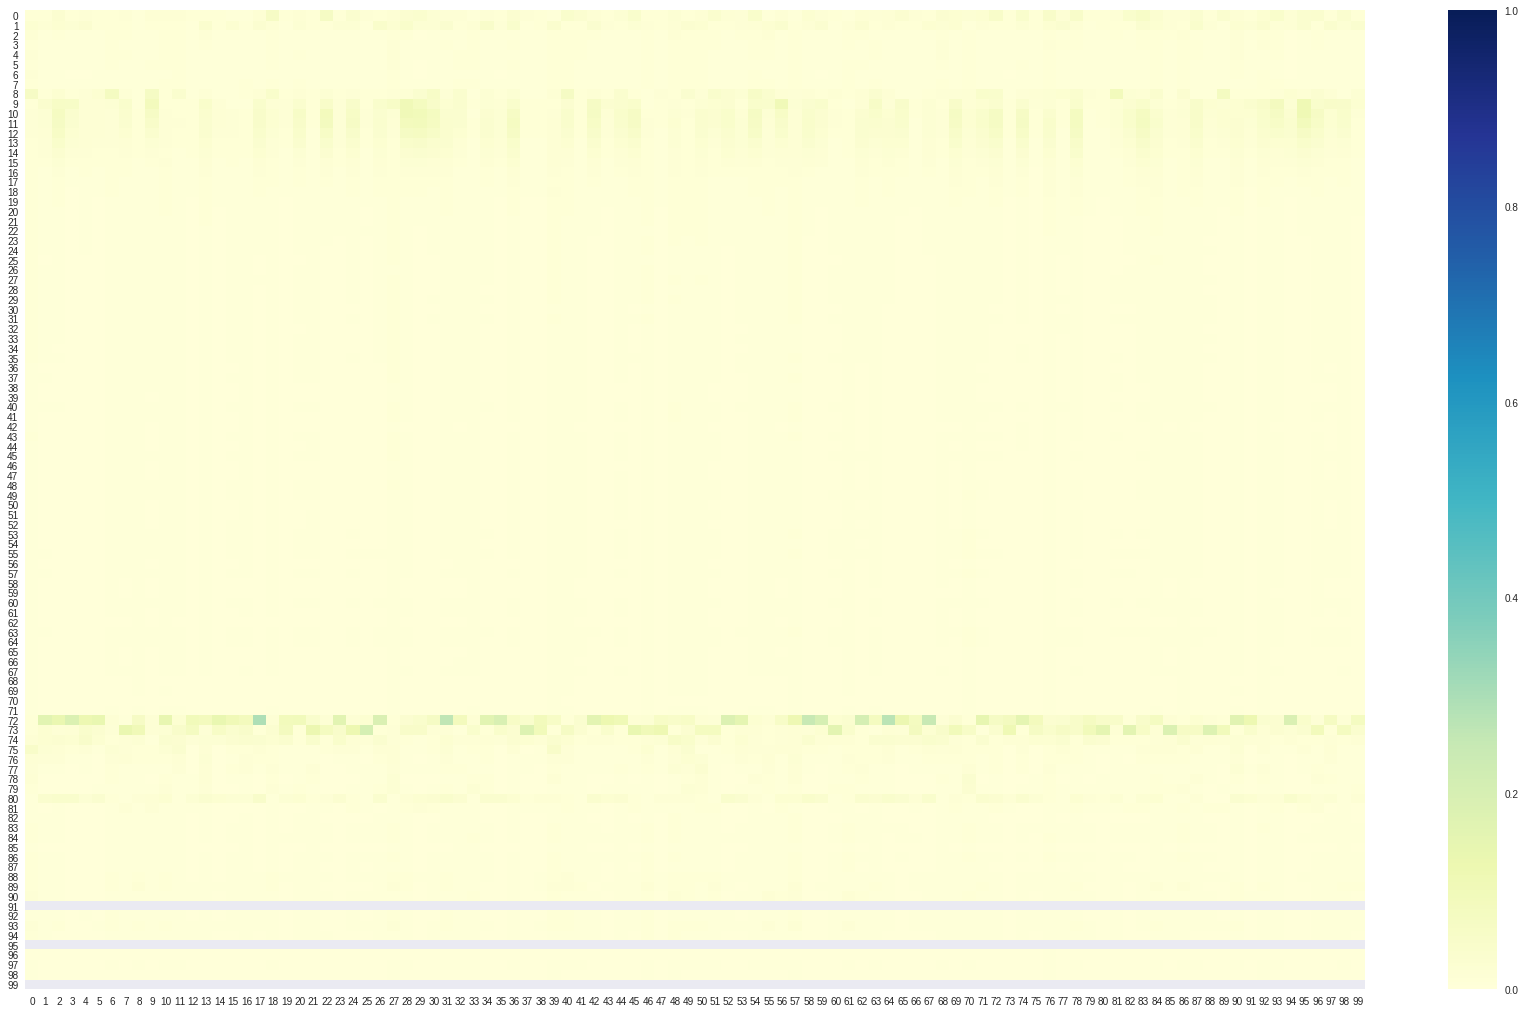

In [323]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(30, 18)
sb.heatmap(mi_layer1, cmap = 'YlGnBu', vmin = 0, vmax = 1)

In [ ]:
plt

In [173]:
import numpy as np

def entropy(counts):
    '''Compute entropy.'''
    ps = counts/float(np.sum(counts))  # coerce to float and normalize
    ps = ps[np.nonzero(ps)]            # toss out zeros
    H = -sum(ps * np.log2(ps))   # compute entropy
    #H = scipy.stats.entropy(ps,base=2)
    return H

def mi(x, y):
    '''Compute mutual information'''
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    counts_xy = np.histogram2d(x, y, bins=bins)[0]
    counts_x  = np.histogram(x, bins=bins)[0]
    counts_y  = np.histogram(y, bins=bins)[0]
    
    H_xy = entropy(counts_xy)
    H_x  = entropy(counts_x)
    H_y  = entropy(counts_y)
    
    mi = H_x + H_y - H_xy
    #mi_normed = np.sqrt(1. - np.exp(-2 * mi))
    mi_normed = mi/(np.sqrt(H_x*H_y))
    return mi_normed
    #return mi
def mutual_information_matrix(data):
    #print(data.shape[0])
    matrix = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            matrix[i][j] = mi(data[i], data[j])
    return matrix

def mutual_information_matrix_2(data,data2):
    #print(data.shape[0])
    matrix = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            matrix[i][j] = mi(data[i], data2[j])
    return matrix

def mutual_information_matrix_3(data,data2):
    #print(data.shape[0])
    matrix = np.zeros((data.shape[0]))
    for i in range(data.shape[0]):
            matrix[i] = mi(data[i], data2[i])
    return matrix

In [180]:
val_data.T.shape[0]

100

In [182]:
from sklearn.metrics.cluster import normalized_mutual_info_score

mi = []
for i in range(val_data.T.shape[0]):
    mi.append(normalized_mutual_info_score(val_data.T[i], val_data.T[i]))


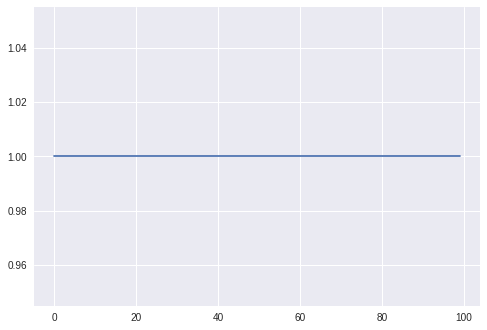

In [183]:
plt.plot(mi)

In [21]:

val_data_corr = np.abs(np.corrcoef(val_data.T))


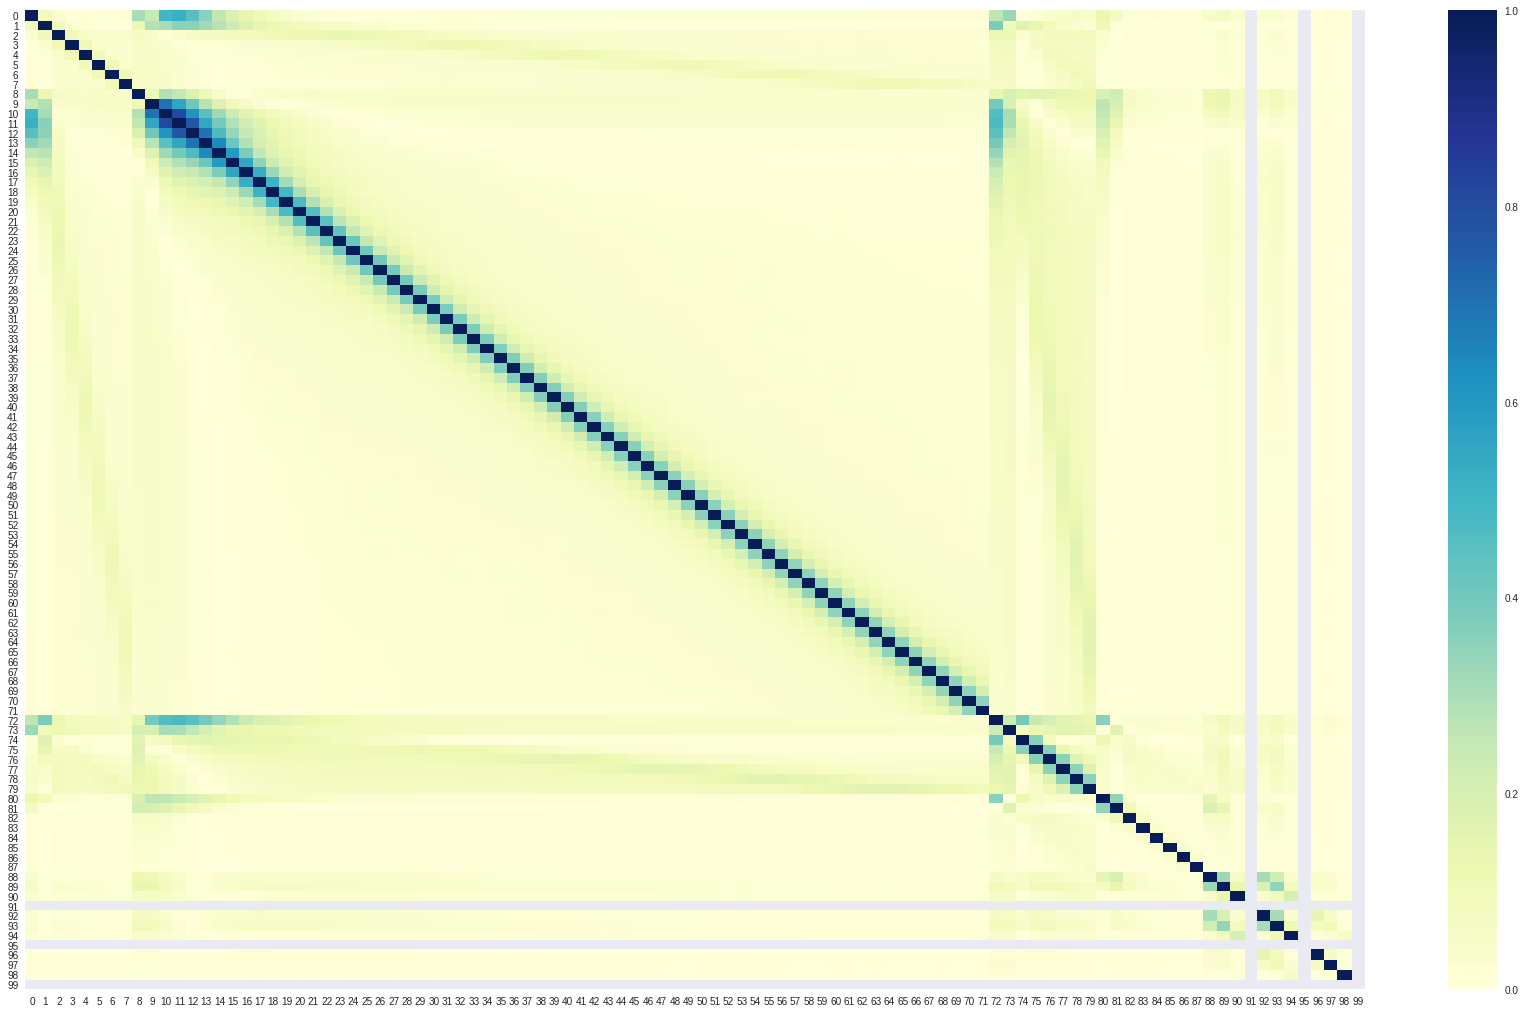

In [24]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(30, 18)
sb.heatmap(val_data_corr, cmap = 'YlGnBu', vmin = 0, vmax =  1)
fig.savefig(dirout+'corr.png')
#plt.show()

In [25]:
from sklearn.decomposition import PCA

In [28]:
val_data.T.shape

(100, 1358079)

In [119]:
centered_matrix = val_data.T - val_data.T.mean(axis=1)[:, np.newaxis]
cov = np.dot(centered_matrix, centered_matrix.T)
eigvals, eigvecs = np.linalg.eig(cov)

In [120]:
output_layer5.shape

(1358079, 20)

In [121]:
centered_matrix = output_layer5.T - output_layer5.T.mean(axis=1)[:, np.newaxis]
cov = np.dot(centered_matrix, centered_matrix.T)
out_eigvals, out_eigvecs = np.linalg.eig(cov)

In [122]:
eigvals.sum()

30240.174

In [123]:
out_eigvals.sum()/eigvals.sum()

0.343898

In [301]:
import numpy as np
from sklearn.neighbors import KernelDensity

# Estimating PDF
def EstPDF(data, bins=np.array([-1,0, 1]), mode='hist', kernel='epanechnikov', kernel_bw=0.01, verbose=False):
    # kernels = 'epanechnikov','gaussian', 'tophat','exponential', 'linear', 'cosine'
    if mode == 'hist':
        if verbose:
            print 'EstPDF: Histogram Mode'
        [y,pts] = np.histogram(data,bins=100,density=True)
        bins_centers = pts[0:-1]+np.diff(pts)
        pdf = y*np.diff(pts)
        return [pdf,bins_centers]
    if mode == 'kernel':
        if verbose:
            print 'EstPDF: Kernel Mode'
        if kernel is None:
            if verbose:
                print 'No kernel defined'
            return -1
        if kernel_bw is None:
            if verbose:
                print 'No kernel bandwidth defined'
            return -1
        kde = (KernelDensity(kernel=kernel,algorithm='auto',bandwidth=kernel_bw).fit(data))
        aux_bins = bins
        log_dens_x = (kde.score_samples(aux_bins[:, np.newaxis]))
        pdf = np.exp(log_dens_x)
        pdf = pdf/sum(pdf)
        bins_centers = bins
        return [pdf,bins_centers]

# Computing KL Divergence
def KLDiv(p, q, bins=np.array([-1,0, 1]), mode='hist', kernel='epanechnikov', kernel_bw=0.1, verbose=False):
    [p_pdf,p_bins] = EstPDF(p, bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
    [q_pdf,q_bins] = EstPDF(q, bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
    #print len(p_pdf),len(q_pdf)
    kl_values = []
    for i in range(len(p_pdf)):
        if p_pdf[i] == 0 or q_pdf[i] == 0 :
            kl_values = np.append(kl_values,0)
        else:
            kl_value = np.abs(p_pdf[i]*np.log10(p_pdf[i]/q_pdf[i]))
            if np.isnan(kl_value):
                kl_values = np.append(kl_values,0)
            else:
                kl_values = np.append(kl_values,kl_value)
    return [np.sum(kl_values),kl_values]

# Computing KL Divergence
def KLDiv_conj(p, q, bins=np.array([-1,0, 1]), mode='hist', kernel='epanechnikov', kernel_bw=0.1, verbose=False):
    p_pdf_conj=1
    q_pdf_conj=1
    for i_anel in range(100): 
        [ppdf,p_bins] = EstPDF(p[i_anel], bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
        [qpdf,q_bins] = EstPDF(q[i_anel], bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
    
        p_pdf_conj = p_pdf_conj*ppdf
        q_pdf_conj = q_pdf_conj*qpdf
    
    p_pdf=p_pdf_conj
    q_pdf=q_pdf_conj
    
    #print len(p_pdf),len(q_pdf)
    kl_values = []
    for i in range(len(p_pdf)):
        if p_pdf[i] == 0 or q_pdf[i] == 0 :
            kl_values = np.append(kl_values,0)
        else:
            kl_value = np.abs(p_pdf[i]*np.log10(p_pdf[i]/q_pdf[i]))
            if np.isnan(kl_value):
                kl_values = np.append(kl_values,0)
            else:
                kl_values = np.append(kl_values,kl_value)
    return [np.sum(kl_values),kl_values]

In [248]:
#KLDiv(val_data.T[0],output_layer.T[0])
pdf,bins = EstPDF(val_data.T[84], verbose=True)

EstPDF: Histogram Mode


In [300]:
val_data.T.shape

(100, 1358079)

In [259]:
kl1 = np.zeros((10, 100))
kl2 = np.zeros((10, 100))
kl3 = np.zeros((10, 100))
kl4 = np.zeros((10, 100))
kl5 = np.zeros((10, 100))

for ianel in range(val_data.T.shape[0]):
    pdf,bins = KLDiv(val_data.T[ianel],output_layer.T[ianel])
    kl.append(pdf)

    #print i

    #KLDiv(val_data.T[84],output_layer.T[84])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [251]:
val_data.T.shape,output_layer.T.shape

((100, 1358079), (100, 1358079))

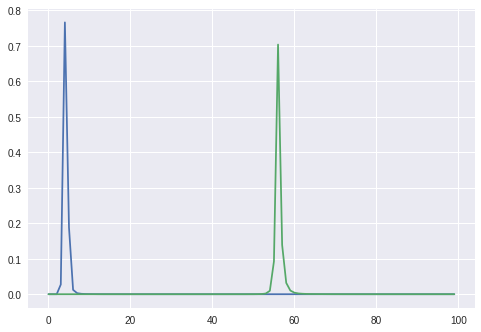

In [339]:

for i in [80,89]:
    pdf, a = EstPDF(val_data.T[i])
    plt.plot(pdf)
    plt.title('Pdf Anel 80 e Anel 89',fontsize= 'xx-large')
    plt.ylabel('Div Kullback-Leibler',fontsize= 'xx-large')
    plt.xlabel('Aneis',fontsize= 'xx-large')
    plt.tick_params(axis='both',labelsize=16)
    plt.savefig(dirout+'pdf_'+str(i)+'_.png')
#plt.savefig(dirout+'60X40_kl_recons_anel.png')

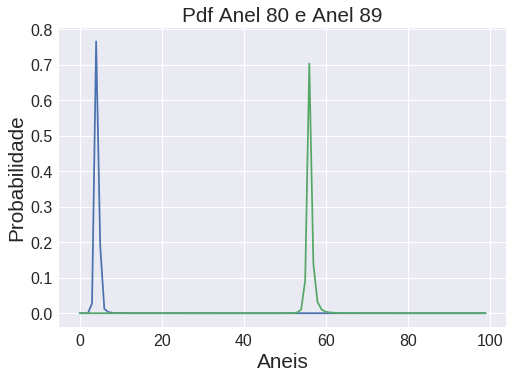

In [340]:
for i in [80,89]:
    pdf, a = EstPDF(val_data.T[i])
    plt.plot(pdf)
    plt.title('Pdf Anel 80 e Anel 89',fontsize= 'xx-large')
    plt.ylabel('Probabilidade',fontsize= 'xx-large')
    plt.xlabel('Aneis',fontsize= 'xx-large')
    plt.tick_params(axis='both',labelsize=16)
    plt.savefig(dirout+'pdf_'+str(i)+'_.png')
#plt.savefig(dirout+'60X40_kl_recons_anel.png')

In [ ]:
KLDiv(val_data.T[0],output_layer.T[0])
plt.plot(pdf)